In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [2]:
def show(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((2,2)), cmap='Greys_r')  


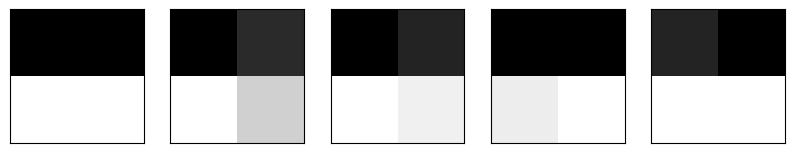

In [3]:
faces = [np.array([1,1,0,0]),
         np.array([0.9,0.8,0.2,0.4]),
         np.array([0.9,0.8,0.1,0.2]),
         np.array([0.8,0.8,0.2,0.1]),
         np.array([0.8,0.9,0.1,0.1])]
    
show(faces, 1, 5)

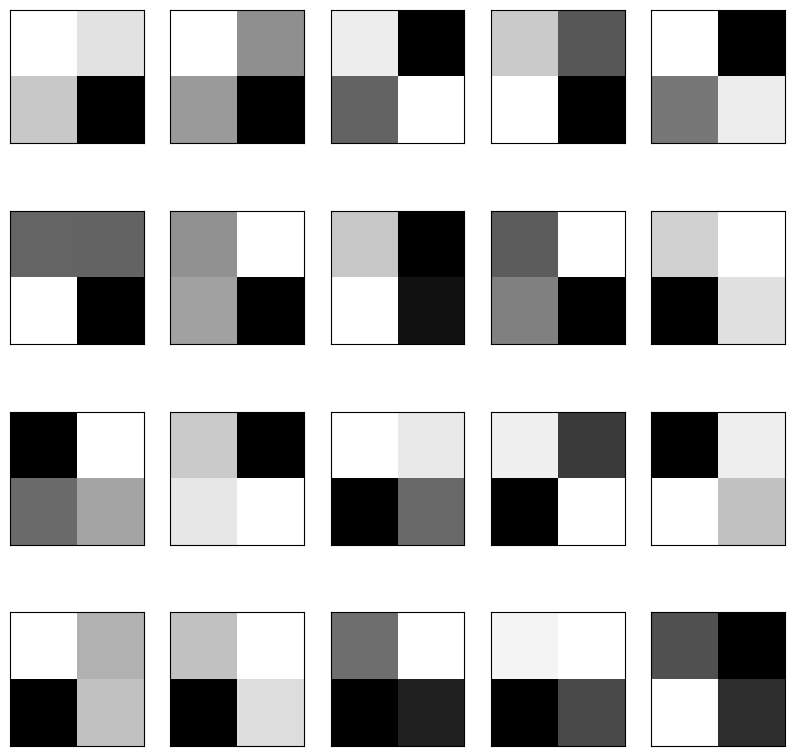

In [4]:
noise = [np.random.randn(2,2) for i in range(20)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

show(noise, 1,5)

In [7]:
# The sigmoid activation function
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [9]:
class Discriminator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_image(self, image):
        prediction = self.forward(image)
        return -np.log(prediction)
    
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        return -np.log(1-prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        derivs = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * derivs[0]
        self.bias -= learning_rate * derivs[1]

In [11]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.biases = np.array([np.random.normal() for i in range(4)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        derivs = self.derivatives(z, discriminator)
        self.weights -= learning_rate * derivs[0]
        self.biases -= learning_rate * derivs[1]
        error_after = self.error(z, discriminator)

In [13]:
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# The GAN
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for face in faces:
        
        D.update_from_image(face)
        z = random.rand()

        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
        
        errors_generator.append(G.error(z, D))
  
        noise = G.forward(z)
        
        D.update_from_noise(noise)
    
        G.update(z, D)

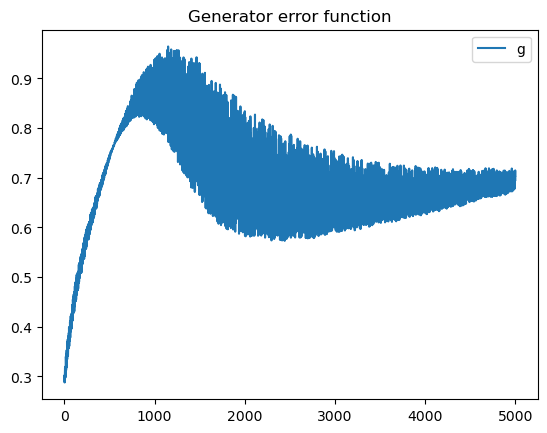

Text(0.5, 1.0, 'Discriminator error function')

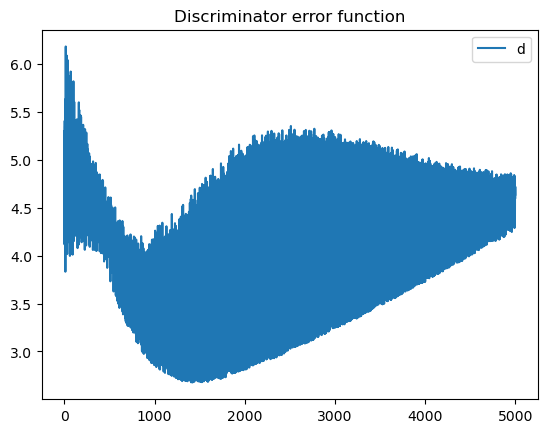

In [16]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error")

[0.94759634 0.94947311 0.04208092 0.04632814]
[0.9569518  0.974517   0.03736598 0.03004918]
[0.95116176 0.96041051 0.04032404 0.03968597]
[0.94315207 0.93321169 0.04421087 0.05535813]


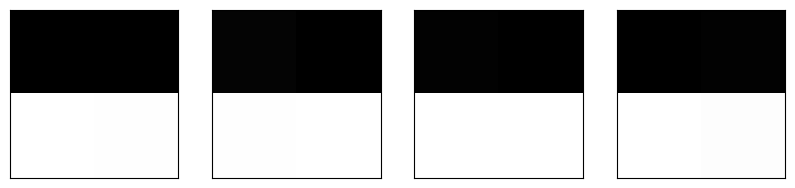

In [17]:
generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
show(generated_images, 1, 4)
for i in generated_images:
    print(i)

In [18]:
print("Generator weights", G.weights)
print("Generator biases", G.biases)

Generator weights [ 0.69244557  2.3828035  -0.41498183 -1.50856659]
Generator biases [ 2.50735948  1.5996401  -2.89288511 -2.18015803]


In [19]:
print("Discriminator weights", D.weights)
print("Discriminator bias", D.bias)

Discriminator weights [ 0.32320468  0.42187118 -0.29843556 -0.08447009]
Discriminator bias -0.688087430512511
